# Notebook for plotting the "B-field discovery limit" for IAXO and IAXO+

We define this to be the median expected discovery limit for a 95\% CL exclusion limit on the value of the magnetic field. 

We have two plots: pre discovery and post-discovery.

For the pre-discovery we use the "BinnedPhotonNumberTable_AllModes" event rates so that the exclusion limits correspond to the sensitivity in the initial run of IAXO

For the post-discovery we use the "BinnedPhotonNumberTable_BDiscoveryStrategy" event rates which optimises the pressure setting for the corresponding flux

In [1]:
import sys
sys.path.append('../src')
from Params import *
from PlotFuncs import *
from Like import *
from AxionFuncs import *  

In [2]:
# Range of B-fields we consider

B_rad=5e3
B_tach=50.0
B_outer=3.0

B_rad_max = 3e7*1e-4
B_rad_min = 2e6*1e-4
print('B_rad between',B_rad_min,B_rad_max,'T')

B_tach_max = B_tach*1
B_tach_min = 1e5*1e-4
print('B_tach between',B_tach_min,B_tach_max,'T')

B_outer_max = 4e4*1e-4
B_outer_min = 3e4*1e-4
print('B_outer between',B_outer_min,B_outer_max,'T')


B_rad between 200.0 3000.0 T
B_tach between 10.0 50.0 T
B_outer between 3.0 4.0 T


# Pre discovery sensitivity

In [3]:
# Load fluxes
E_res = 2e-3
E_max = 1.0
nfine = 100
nE_bins = 50
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_rad(B_rad=B_rad))
Flux10_2 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_tach(B_tach=B_tach))
Flux10_3 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_outer(B_outer=B_outer))

In [4]:
# Binned photon number tables
nm = 500
m_vals = logspace(-4.1,log10(5.1e-1),nm)

print('Flux0')
R_tab_0,R0_0 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_0,res_on=True)
print('Flux1')
R_tab_1,R0_1 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_1,res_on=True)
print('Flux2')
R_tab_2,R0_2 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_2,res_on=True)
print('Flux3')
R_tab_3,R0_3 = BinnedPhotonNumberTable_AllModes(m_vals,Ei,E_bins,Flux10_3,res_on=True)

# Background
Background = BinnedBackgroundEvents(Ei,E_bins,background_level=1e-8)

Flux0
Flux1
Flux2
Flux3


In [5]:
m_DL_vals = logspace(-4,log10(5e-1),500)

# Uncomment this to do the full likelihood analysis (takes a while to run)
# B_DL_1_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_1,Background)
# B_DL_2_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_2,Background)
# B_DL_3_3year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R_tab_0,R_tab_3,Background)

# B_DL_1_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_1,Background)
# B_DL_2_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_2,Background)
# B_DL_3_6year = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,2*R_tab_0,2*R_tab_3,Background)



# But we can get an equivalent sensitivity at much less computation cost by doing:

# 3 year limits
B_DL_1_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_1) # RZ 
B_DL_2_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_2) # Tachocline 
B_DL_3_3year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R_tab_3) # Upper layers 

# 6 year limits
B_DL_1_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_1) # RZ 
B_DL_2_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_2) # Tachocline 
B_DL_3_6year = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,2*R_tab_3) # Upper layers  



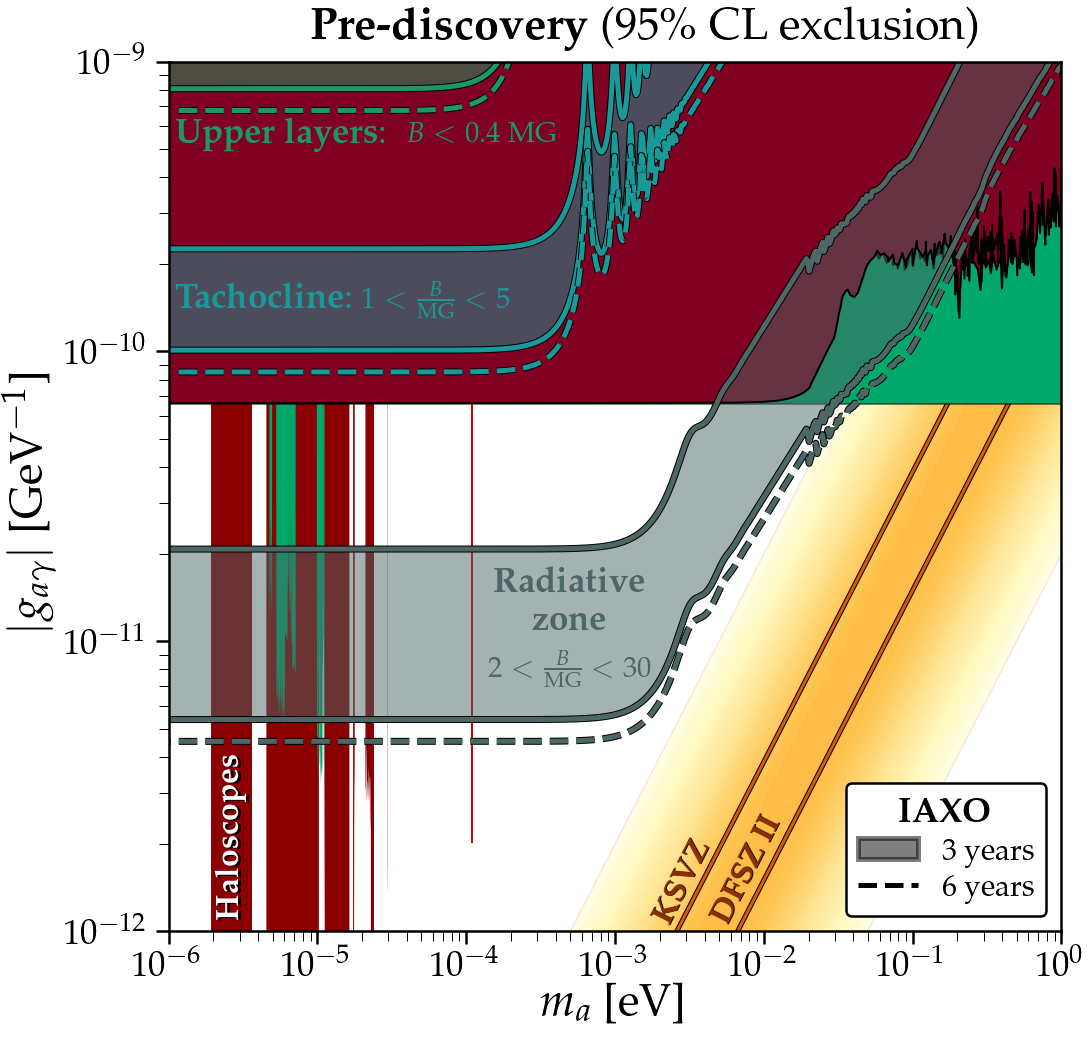

In [10]:
import matplotlib.patheffects as pe

fig,ax = AxionPlotSetup(CAST_text_on=False,StellarBounds_text_on=False)

path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()]
path_effects_w=[pe.Stroke(linewidth=7, foreground='w'), pe.Normal()]

IAXO_sens_col = 'blue'
IAXO_Bsens_col = [0.2,0.4,0.4]

col1 = [0.3,0.4,0.4]
col2 = [0.1,0.6,0.6]
col3 = [0.1,0.6,0.4]
alph = 0.5

m_DL_vals1 = concatenate((array([1e-7]),m_DL_vals))


# Radiative zone
y1 = append(B_DL_1_3year[0],B_DL_1_3year)*sqrt(B_rad/B_rad_min)
y2 = append(B_DL_1_3year[0],B_DL_1_3year)*sqrt(B_rad/B_rad_max)
y1_1= append(B_DL_1_6year[0],B_DL_1_6year)*sqrt(B_rad/B_rad_min)
y2_1 = append(B_DL_1_6year[0],B_DL_1_6year)*sqrt(B_rad/B_rad_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col1,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
ty1 = y1[0]

# Tachocline
y1 = append(B_DL_2_3year[0],B_DL_2_3year)*sqrt(B_tach/B_tach_min)
y2 = append(B_DL_2_3year[0],B_DL_2_3year)*sqrt(B_tach/B_tach_max)
y1_1= append(B_DL_2_6year[0],B_DL_2_6year)*sqrt(B_tach/B_tach_min)
y2_1 = append(B_DL_2_6year[0],B_DL_2_6year)*sqrt(B_tach/B_tach_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col2,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
ty2 = y1[0]


# Upper layers
y1 = append(B_DL_3_3year[0],B_DL_3_3year)*sqrt(B_outer/B_outer_min)
y2 = append(B_DL_3_3year[0],B_DL_3_3year)*sqrt(B_outer/B_outer_max)
y1_1= append(B_DL_3_6year[0],B_DL_3_6year)*sqrt(B_outer/B_outer_min)
y2_1 = append(B_DL_3_6year[0],B_DL_3_6year)*sqrt(B_outer/B_outer_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col3,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
ty3 = y2_1[0]


# Text labels:
tfs = 35
plt.text(5e-4,ty1/1.4,r'{\bf Radiative}',color=col1,fontsize=tfs,ha='center')
plt.text(5e-4,ty1/1.9,r'{\bf zone}',color=col1,fontsize=tfs,ha='center')
plt.text(5e-4,ty1/3,r'$2<\frac{B}{\rm MG}<30$',color=col1,fontsize=tfs-6,ha='center')
plt.text(1.1e-6,ty2/1.6,r'{\bf Tachocline}:',color=col2,fontsize=tfs)
plt.text(2e-5,ty2/1.6,r'$1<\frac{B}{\rm MG}<5$',color=col2,fontsize=tfs-6,va='center')
plt.text(1.1e-6,ty3*0.78,r'{\bf Upper layers}:',color=col3,fontsize=tfs)
plt.text(4e-5,ty3*0.78,r'$B<0.4$ MG',color=col3,fontsize=tfs-6)
plt.gcf().text(0.54,0.9,r'{\bf Pre-discovery} (95\% CL exclusion)',fontsize=45,ha='center')


# Legend:
plt.fill_between([1e-7,1e-8],[1,1],y2=[1,1],lw=5,label='3 years',alpha=alph,color='k')
plt.plot([1e-7,1e-8],[1,1],'k--',lw=5,label='6 years')
handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend(flipud(handles), flipud(labels),fontsize=30,frameon=True,title=r'{\bf IAXO}',loc='lower right',framealpha=1,edgecolor='k',labelspacing=0.2)
leg.get_frame().set_linewidth(2.5)

# Save figure:
MySaveFig(fig,'IAXO_SeismicBfield_sensitivity')

# Post-discovery strategy with single Buffer gas setting to optimise sensitivity to B-field in certain range

In [7]:


# Make a new function for a slightly refined strategy where we have more control over the pressure
def BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10,\
                           Bfield=2.5,Exposure=2.0,Length=20.0,\
                           N_bores=8,BoreDiameter=60.0,eps_D=0.7,eps_T=0.8,res_on=False,
                                    T_operating=1.8,pressure_offset=0.999999):
    nm = size(m_vals)
    nE_bins = shape(E_bins)[0]
    nfine = int(shape(Ei)[0]/nE_bins)

    # Buffer gas part:
    Signal_10_BG1 = zeros(shape=(nE_bins,nm))
    T_operating=1.8
    p_vals = pressure_offset*(m_vals)**2.0*T_operating/0.02
    mask = p_vals<16.405
    p_vals[~mask] = 100.0
    n_p = sum(mask)

    E_min = amin(Ei)
    
    if res_on==False:
        E_min = 0.0
    for j in range(0,nm):
        if p_vals[j]<100.0:
            dN = PhotonNumber_gag_BufferGas(Ei,Flux10,m_vals[j],p_vals[j],g=1e-10,\
                     Bfield=Bfield,Exposure=Exposure,Length=Length,T_operating=T_operating,\
                     N_bores=N_bores,BoreDiameter=BoreDiameter,eps_D=eps_D,eps_T=eps_T,Eres=E_min)
            for i in range(0,nE_bins):
                Ebin = Ei[i*nfine:(i+1)*nfine]
                dNbin = dN[i*nfine:(i+1)*nfine]
                Signal_10_BG1[i,j] = sum(0.5*(Ebin[1:]-Ebin[0:-1])*(dNbin[1:]+dNbin[0:-1]))

    return Signal_10_BG1
        
# Mass values
nm = 500
m_vals = logspace(-4.51,1.1,nm)


# Load fluxes
E_res = 1e-3
E_max = 1.0
nfine = 100
nE_bins = 50
Ei,E_bins = EnergyBins(E_res,E_max,nfine,nE_bins)
Flux10_0 = AxionFlux_Primakoff_PlasmonCorrection(1e-10,Ei)
Flux10_1 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_rad(B_rad=B_rad))
Flux10_2 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_tach(B_tach=B_tach))
Flux10_3 = AxionFlux_Lplasmon(1e-10,Ei,B_model_seismic_outer(B_outer=B_outer))

# Parameters
res_on = True
po1 = 0.0
po2 = 0.0

# IAXO
Exposure = 6.0
#R0_0 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_0,res_on=res_on,Exposure=Exposure)
R0_1 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_1,res_on=res_on,Exposure=Exposure) # RZ
R0_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,pressure_offset=po1) # Tachocline
R0_3 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_3,res_on=res_on,Exposure=Exposure,pressure_offset=po2) # Upper layers

# IAXO+
Exposure = 12.0
#R1_1 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_0,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0)
R1_1 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_1,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0) # RZ
R1_2 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_2,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po1) # Tachocline
R1_3 = BinnedPhotonNumberTable_BDiscoveryStrategy(m_vals,Ei,E_bins,Flux10_3,res_on=res_on,Exposure=Exposure,Length=22.0,Bfield=3.5,BoreDiameter=60.0,pressure_offset=po2) # Upper layers


# Background
Background = BinnedBackgroundEvents(Ei,E_bins,background_level=1e-9)

In [8]:
m_DL_vals = logspace(-4.5,0,500)

# Uncomment to do full likelihood analysis
# B_DL_1_0 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R0_0,R0_1,Background)
# B_DL_2_0 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R0_0,R0_2,Background)
# B_DL_3_0 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R0_0,R0_3,Background)

# B_DL_1_1 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R1_0,R1_1,Background)
# B_DL_2_1 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R1_0,R1_2,Background)
# B_DL_3_1 = ProfileLikelihood_BfieldSensitivity(m_DL_vals,m_vals,R1_0,R1_3,Background)


# Quick way which gets roughly the write result:

# IAXO
B_DL_1_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_1) # RZ
B_DL_2_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_2) # Tachocline
B_DL_3_0 = ConstantObsNumberLine(1.6,m_DL_vals,m_vals,R0_3) # Upper layers

# IAXO+
B_DL_1_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_1) # RZ
B_DL_2_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_2) # Tachocline 
B_DL_3_1 = ConstantObsNumberLine(1.0,m_DL_vals,m_vals,R1_3) # Upper layers



../src/Like.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  g[i] = 1e-10*(N_ob/sum(N_exp_10))**0.25


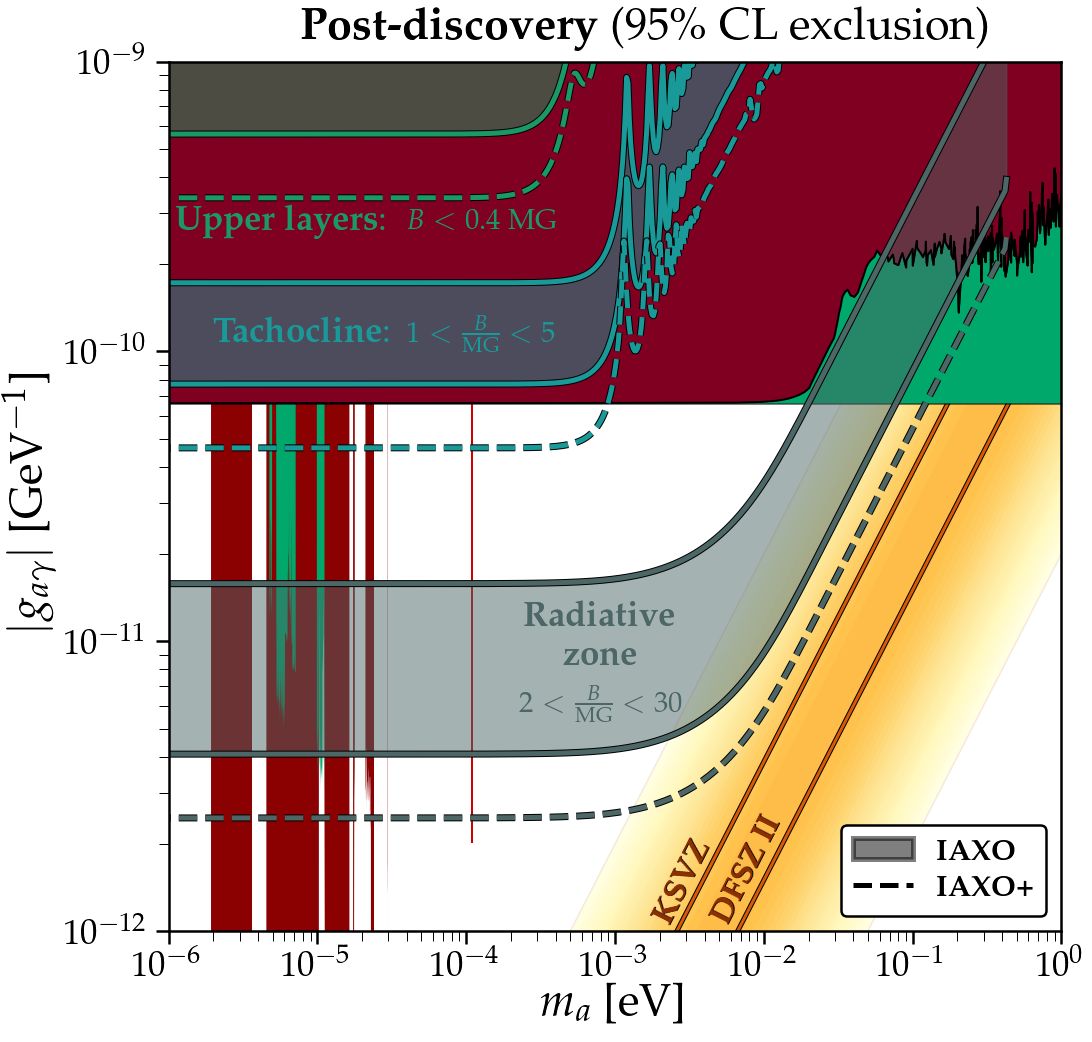

In [9]:
fig,ax = AxionPlotSetup(CAST_text_on=False,StellarBounds_text_on=False,Haloscopes_text_on=False)


# Radiative zone
m_DL_vals1 = concatenate((array([1e-7]),m_DL_vals))
y1 = append(B_DL_1_0[0],B_DL_1_0)*sqrt(B_rad/B_rad_min)
y2 = append(B_DL_1_0[0],B_DL_1_0)*sqrt(B_rad/B_rad_max)
y1_1= append(B_DL_1_1[0],B_DL_1_1)*sqrt(B_rad/B_rad_min)
y2_1 = append(B_DL_1_1[0],B_DL_1_1)*sqrt(B_rad/B_rad_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col1,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col1,path_effects=path_effects,zorder=1.5)
ty1 = y1[0]

# Tachocline
y1 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_min)
y2 = append(B_DL_2_0[0],B_DL_2_0)*sqrt(B_tach/B_tach_max)
y1_1= append(B_DL_2_1[0],B_DL_2_1)*sqrt(B_tach/B_tach_min)
y2_1 = append(B_DL_2_1[0],B_DL_2_1)*sqrt(B_tach/B_tach_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col2,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col2,path_effects=path_effects,zorder=1.5)
ty2 = y1[0]


# Upper layers
B_outer_min = 1.0
y1 = append(B_DL_3_0[0],B_DL_3_0)*sqrt(B_outer/B_outer_min)
y2 = append(B_DL_3_0[0],B_DL_3_0)*sqrt(B_outer/B_outer_max)
y1_1= append(B_DL_3_1[0],B_DL_3_1)*sqrt(B_outer/B_outer_min)
y2_1 = append(B_DL_3_1[0],B_DL_3_1)*sqrt(B_outer/B_outer_max)
plt.fill_between(m_DL_vals1,y1,y2=y2,alpha=alph,color=col3,zorder=1.5)
plt.plot(m_DL_vals1,y1,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2,'-',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
#plt.plot(m_DL_vals1,y1_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
plt.plot(m_DL_vals1,y2_1,'--',lw=5,color=col3,path_effects=path_effects,zorder=1.5)
ty3 = y2_1[0]

# Text labels
plt.text(8e-4,ty1/1.4,r'{\bf Radiative}',color=col1,fontsize=tfs,ha='center')
plt.text(8e-4,ty1/1.9,r'{\bf zone}',color=col1,fontsize=tfs,ha='center')
plt.text(8e-4,ty1/3,r'$2<\frac{B}{\rm MG}<30$',color=col1,fontsize=tfs-6,ha='center')
plt.text(2e-6,ty2/1.6,r'{\bf Tachocline}:',color=col2,fontsize=tfs)
plt.text(4e-5,ty2/1.6,r'$1<\frac{B}{\rm MG}<5$',color=col2,fontsize=tfs-6,va='center')
plt.text(1.1e-6,ty3*0.78,r'{\bf Upper layers}:',color=col3,fontsize=tfs)
plt.text(4e-5,ty3*0.78,r'$B<0.4$ MG',color=col3,fontsize=tfs-6)
plt.fill_between([1e-7,1e-8],[1,1],y2=[1,1],lw=5,label=r'{\bf IAXO}',alpha=alph,color='k')
plt.plot([1e-7,1e-8],[1,1],'k--',lw=5,label=r'{\bf IAXO+}')
plt.gcf().text(0.54,0.9,r'{\bf Post-discovery} (95\% CL exclusion)',fontsize=45,ha='center')

# Legend
handles, labels = plt.gca().get_legend_handles_labels()
leg = plt.legend(flipud(handles), flipud(labels),fontsize=30,frameon=True,loc='lower right',framealpha=1,edgecolor='k',labelspacing=0.2)
leg.get_frame().set_linewidth(2.5)

# Save figure
MySaveFig(fig,'IAXO_SeismicBfield_sensitivity_post_discovery')